# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

# Data Exploration

In [2]:
data = pd.read_csv(r"C:\Users\aabha\Downloads\input data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Here, Quality is the target variable and all other are features.

In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There are no null values in the dataset

In [6]:
data.nunique().sort_values()

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

# Exploratory Data Analysis

In [7]:
target = 'quality'

features = [i for i in data.columns if i not in target]

labels = ['quality3','quality4', 'quality5', 'quality6', 'quality7', 'quality8']

Let's first analyze the target component i.e. quality

In [8]:
map_ = {}

for i, j in enumerate(sorted(data[target].unique())):
    map_[j] = labels[i]

df_copy = data.copy()
df_copy[target] = df_copy[target].map(map_)

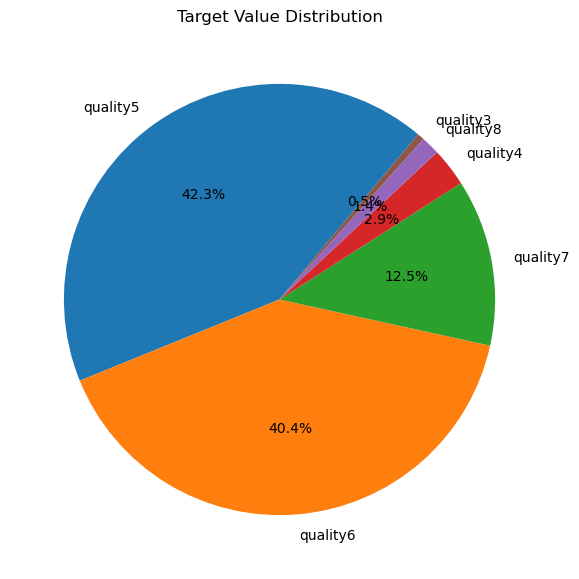

In [9]:
plt.figure(figsize = (8,7))

quality_name = df_copy[target].value_counts().index

quality_value = df_copy[target].value_counts()

plt.pie(quality_value, labels = quality_name ,  autopct='%1.1f%%', startangle = 50)

plt.title('Target Value Distribution')
plt.show()

The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

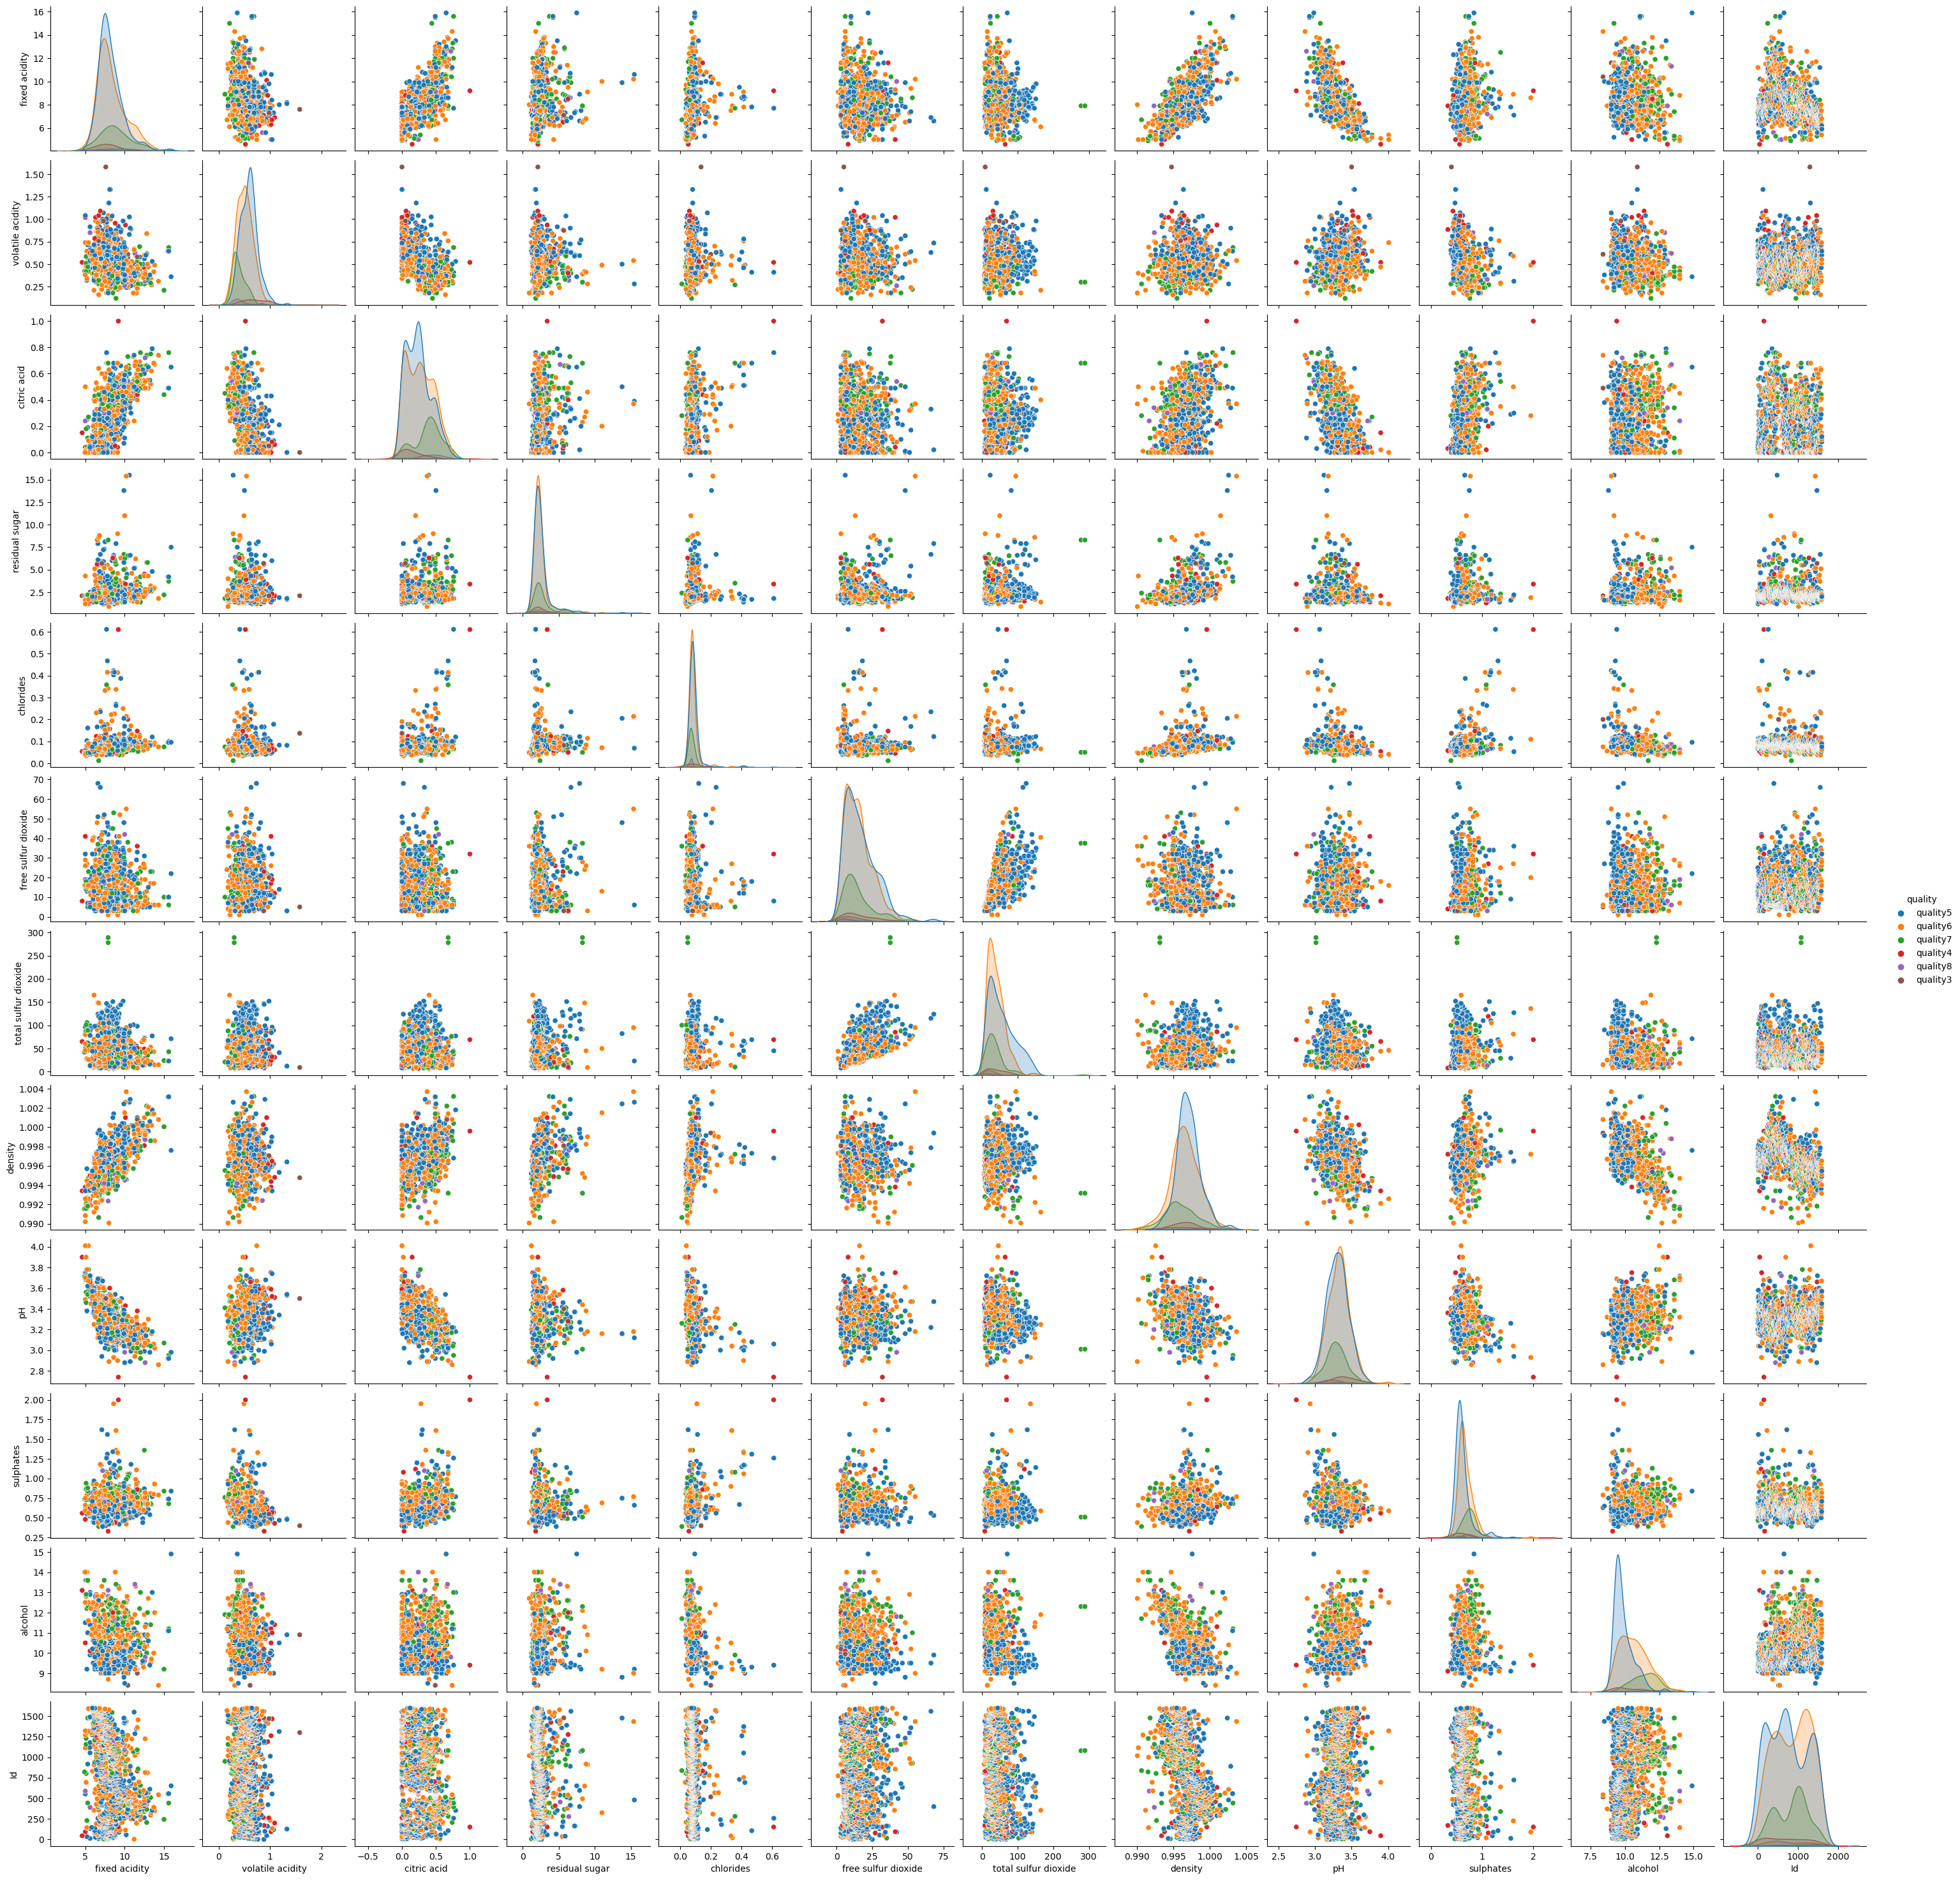

In [10]:
# understanding the relationship between all features

sns.pairplot(df_copy, hue = target)

# Data Preproessing

In [11]:
# Removal of Duplicate value

df1 = data.copy()

a,b = data.shape

df1.drop_duplicates(inplace = True)

if df1.shape == (a,b):
    print("There are no duplicates in the dataset")
else:
    print("There are ", "(",c-a, d-b,")", "duplicates present in the dataset")

There are no duplicates in the dataset


In [12]:
# Checking Null values

df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [13]:
df1.shape

(1143, 13)

There are no null values present in the dataset

In [14]:
# Removal of outlier

df2 = df1.copy()

col_name = [i for i in df1.columns]

for i in col_name:
    if df1[i].nunique() >= 12:
        q1 = df1[i].quantile(0.06)
        q3 = df1[i].quantile(0.94)

        iqr = q3 - q1

        df1 = df1[df1[i] >= q1 - 1.5*iqr]
        df1 = df1[df1[i] <= q3 + 1.5*iqr]
        
df1.reset_index(inplace = True, drop = True)

print("Before removal of outliers, dataset has ", df2.shape," samples.")
print("After removal of outliers, dataset has ", df1.shape," samples")

Before removal of outliers, dataset has  (1143, 13)  samples.
After removal of outliers, dataset has  (1106, 13)  samples


In [15]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [16]:
print("Distribution of target values :")

df1[target].value_counts()

Distribution of target values :


5    467
6    445
7    140
4     32
8     16
3      6
Name: quality, dtype: int64

In [17]:
# Fixing the imbalanced distribution using smote technique

col = df1.columns
x = df1.drop([target], axis = 1)
y = df1[target]

smote = SMOTE()

x, y = smote.fit_resample(x, y)

df1 = pd.DataFrame(x, columns = col)
df1[target] = y

In [18]:
print("Class distribution after applying SMOTE technique : ")
df1[target].value_counts()

Class distribution after applying SMOTE technique : 


5    467
6    467
7    467
4    467
8    467
3    467
Name: quality, dtype: int64

Now, the dataset is balanced.

In [19]:
# Final Dataset size after performing Preprocessing

df1.shape

(2802, 13)

# Data Manipulation

In [20]:
# test train split

x = df1.drop([target], axis = 1)
y = df1[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

print("Original Dataset shape = ", df1.shape)
print("Train Dataset shape = ", x_train.shape, y_train.shape)
print("Test Dataset shape = ", x_test.shape, y_test.shape)

Original Dataset shape =  (2802, 13)
Train Dataset shape =  (2241, 12) (2241,)
Test Dataset shape =  (561, 12) (561,)


In [21]:
# Feature scaling

scaler = StandardScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

print("Standardized Training Set : ".center(100))
display(train_scaled.describe())

print("\n","Standardized Test Set : ".center(100))
display(test_scaled.describe())

                                    Standardized Training Set :                                     


fixed acidity  volatile acidity   citric acid  residual sugar  \
count   2.241000e+03      2.241000e+03  2.241000e+03    2.241000e+03   
mean   -2.171895e-16     -1.014608e-16  7.768093e-17    5.112674e-17   
std     1.000223e+00      1.000223e+00  1.000223e+00    1.000223e+00   
min    -2.252176e+00     -1.842537e+00 -1.383271e+00   -1.581955e+00   
25%    -7.323383e-01     -7.770946e-01 -9.914851e-01   -5.829046e-01   
50%    -2.116530e-01     -1.338006e-01 -1.201932e-02   -3.381775e-01   
75%     6.380105e-01      5.053821e-01  8.406684e-01    1.511373e-01   
max     4.335799e+00      3.918743e+00  2.485619e+00    5.880370e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  2.241000e+03         2.241000e+03          2.241000e+03  2.241000e+03   
mean   1.521912e-16        -1.093874e-16         -7.926626e-19  5.982700e-14   
std    1.000223e+00         1.000223e+00          1.000223e+00  1.000223e+00   
min   -2.805107e+00        -1.385230e+00         -1.186726e+00 -3.482062e+00   
25%   -5.503755e-01        -8.036958e-01         -7.296665e-01 -6.897589e-01   
50%   -2.195077e-01        -2.808541e-01         -3.245688e-01 -1.873448e-02   
75%    2.140402e-01         4.750663e-01          4.073885e-01  6.503382e-01   
max    4.653603e+00         6.407331e+00          4.534863e+00  3.467630e+00   

                 pH     sulphates       alcohol            Id  
count  2.241000e+03  2.241000e+03  2.241000e+03  2.241000e+03  
mean   1.624958e-16 -4.026726e-16  6.404714e-16  8.719288e-17  
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00  
min   -2.908439e+00 -2.275024e+00 -1.945085e+00 -1.871254e+00  
25%   -6.905484e-01 -6.874822e-01 -8.131297e-01 -8.419301e-01  
50%   -4.912459e-02 -1.973006e-01 -1.373264e-01  1.879724e-02  
75%    6.288475e-01  5.931317e-01  6.979679e-01  9.039267e-01  
max    4.588575e+00  4.858493e+00  3.660422e+00  1.671483e+00


                                       Standardized Test Set :                                       


fixed acidity  volatile acidity   citric acid  residual sugar  \
count   5.610000e+02      5.610000e+02  5.610000e+02    5.610000e+02   
mean   -3.356396e-16      2.026503e-16  6.966105e-17    3.261404e-16   
std     1.000892e+00      1.000892e+00  1.000892e+00    1.000892e+00   
min    -2.206673e+00     -1.860170e+00 -1.358315e+00   -1.239743e+00   
25%    -6.785777e-01     -8.313077e-01 -1.006032e+00   -5.739905e-01   
50%    -2.615728e-01     -9.607392e-02 -4.983463e-02   -3.772464e-01   
75%     5.374398e-01      5.606530e-01  8.057105e-01    7.818329e-02   
max     4.273320e+00      4.129466e+00  2.466474e+00    5.613475e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  5.610000e+02         5.610000e+02          5.610000e+02  5.610000e+02   
mean   9.974196e-17         1.266565e-16          1.773190e-16  5.887309e-14   
std    1.000892e+00         1.000892e+00          1.000892e+00  1.000892e+00   
min   -2.769166e+00        -1.345332e+00         -1.130817e+00 -3.294313e+00   
25%   -5.173284e-01        -7.604899e-01         -7.169687e-01 -6.897422e-01   
50%   -2.207324e-01        -2.926162e-01         -3.330123e-01 -3.877303e-03   
75%    1.182147e-01         4.203382e-01          3.652428e-01  6.297275e-01   
max    4.649864e+00         6.491552e+00          5.089640e+00  3.651548e+00   

                 pH     sulphates       alcohol            Id  
count  5.610000e+02  5.610000e+02  5.610000e+02  5.610000e+02  
mean  -9.879204e-16 -1.076580e-16  1.271314e-15  8.865952e-17  
std    1.000892e+00  1.000892e+00  1.000892e+00  1.000892e+00  
min   -3.190692e+00 -2.248132e+00 -1.892229e+00 -1.821996e+00  
25%   -6.214725e-01 -7.359161e-01 -8.775007e-01 -8.213447e-01  
50%   -3.545243e-03 -1.442024e-01 -1.226669e-01  2.776045e-02  
75%    6.206338e-01  6.392250e-01  6.646958e-01  8.813228e-01  
max    3.798516e+00  3.577024e+00  2.769013e+00  1.714828e+00

# Feature Selection and Extraction

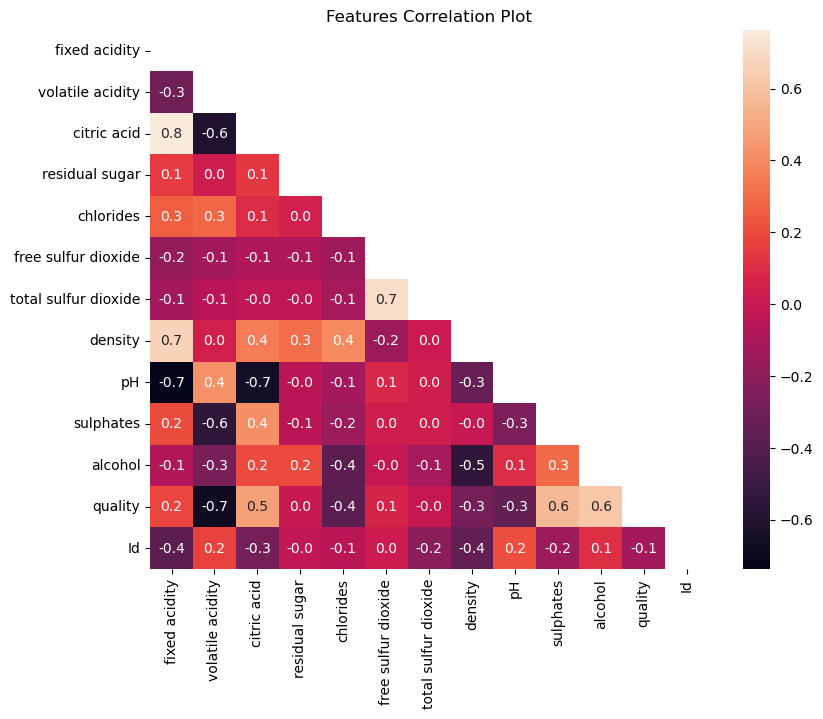

In [22]:
# checking the correlation

plt.figure(figsize = (9,7))
plt.title('Features Correlation Plot')

mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
sns.heatmap(df1.corr(), annot = True, fmt = '.1f', mask = mask)
plt.show()

Correlation plt between the variables convey lot of information about the realationship betweem them. There seems to be strong multicollinearity in the dataset.

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

Strategy :  We can fix these multicollinearity with two techniques:

* Manual Method - Variance Inflation Factor (VIF)
* Automatic Method - Recursive Feature Elimination (RFE)
* Decomposition Method - Principle Component Analysis (PCA)

                                      Principal Component Analysis (PCA)

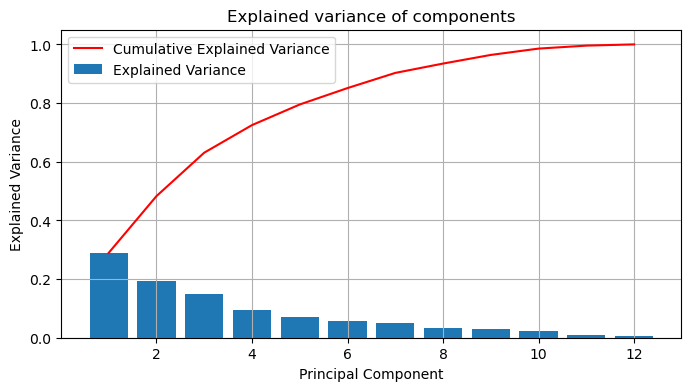

In [23]:
from sklearn.decomposition import PCA

pca = PCA().fit(train_scaled)  

fig, ax = plt.subplots(figsize=(8,4))
x_values = range(1, pca.n_components_+1)

# pca.n_components_ gives the number of principal components retained after fitting the model.

ax.bar(x_values, pca.explained_variance_ratio_, label = 'Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), label = 'Cumulative Explained Variance', color='red')

ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

In [24]:
def calculate_vif(X):
    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

    # Calculate initial VIF values
vif_data = calculate_vif(train_scaled)
print("Initial VIF values:")
print(vif_data)

    # Iterate and remove features with high VIF
threshold = 5  # Set the threshold for VIF, e.g., 5 or 10
drop = []

while True:
        # Calculate VIF
    vif_data = calculate_vif(train_scaled.drop(columns = drop))

    # Get the feature with the highest VIF
    max_vif = vif_data['VIF'].max()
        #print(max_vif)
    if max_vif > threshold:
            # Find the feature with the highest VIF and remove it
        feature_to_drop = vif_data.sort_values('VIF', ascending=False)['Features'].values[0]
        drop.append(feature_to_drop)
    else:
            # If no VIF is greater than the threshold, stop the loop
        break

print(f"\n Final list of features to drop: {drop}")

Initial VIF values:
                Features       VIF
0          fixed acidity  9.470368
1       volatile acidity  2.710177
2            citric acid  4.794095
3         residual sugar  1.886963
4              chlorides  1.465402
5    free sulfur dioxide  2.301467
6   total sulfur dioxide  2.543884
7                density  7.512122
8                     pH  3.596746
9              sulphates  1.653590
10               alcohol  4.362637
11                    Id  1.437911

 Final list of features to drop: ['fixed acidity']


In [26]:
train_scaled.drop(['fixed acidity'], axis = 1, inplace = True)

In [30]:
test_scaled.drop(['fixed acidity'], axis = 1, inplace = True)

In [33]:
print("Train Data Columns = ",train_scaled.columns)

print("\n Test Data Columns = ", test_scaled.columns)

Train Data Columns =  Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'Id'],
      dtype='object')

 Test Data Columns =  Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'Id'],
      dtype='object')


# Predictive Modelling

In [34]:
# Create a final output table 

evaluation_table = pd.DataFrame(np.zeros((8,5)), columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC Score'])

evaluation_table.index = ['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
evaluation_table

Accuracy  Precision  Recall  F1-Score  \
Logistic Regression (LR)              0.0        0.0     0.0       0.0   
Decision Tree Classifier (DT)         0.0        0.0     0.0       0.0   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC Score  
Logistic Regression (LR)                   0.0  
Decision Tree Classifier (DT)              0.0  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)                 0.0  
Gradient Boosting (GB)                     0.0  
Extreme Gradient Boosting (XGB)            0.0

In [35]:
from scikitplot.metrics import plot_roc_curve as auc_roc
# auc-roc itself adjust itself for binomail as well as for multiclass

def classification_summary(y_pred, y_proba, i):
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba, multi_class = 'ovr')
    
    evaluation_table.iloc[i]['Accuracy'] = round(accuracy, 3)*100
    evaluation_table.iloc[i]['Precision'] = round(precision, 3)*100
    evaluation_table.iloc[i]['Recall'] = round(recall, 3)*100
    evaluation_table.iloc[i]['F1-Score'] = round(f1, 3)*100
    evaluation_table.iloc[i]['AUC-ROC Score'] = round(roc_auc, 3)*100
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"\n F1 Score (weighted): {f1 * 100:.2f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix:")
    print(conf_matrix)

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize = (9,6))
    auc_roc(y_test, y_proba, curves = ["each_class"], ax = ax) 
    plt.show()

In [36]:
def auc_roc_score(y_test, y_pred):
    
    temp = [0 for i in range(len(y_test))]  #baseline model that represent for all classes
    temp_auc_score = roc_auc_score(y_test, temp)   #always 0.5 -- worst random guess
    
    pred_auc_score = roc_auc_score(y_test, y_pred)   #calculating auc score using y predicted value
    
    #calculate fpr, tpr for both temp and pred
    temp_fpr, temp_tpr, _  = roc_curve(y_test, temp)
    pred_fpr, pred_tpr, _ = roc_curve(y_test, y_pred)
    
    #plot these points on roc curve
    plt.plot(temp_fpr, temp_tpr, linestyle = "--")
    plt.plot(pred_fpr, pred_tpr, marker = '.', label = 'AUC = {}'.format(round(roc_auc_score(y_test, y_pred)*100,2)))
    
    plt.plot()
    plot.ylabel("True Positive Rate")
    plot.xlabel("False Positive Rate")
    plot.legend()
    plot.show()

# 1) Logistic Regression

Accuracy: 64.88%

 F1 Score (weighted): 63.86

 Confusion Matrix:
[[97  0  0  0  0  0]
 [ 7 58 15 18  2  2]
 [ 7 14 54 15  5  1]
 [ 2  9 11 37 20  7]
 [ 0  3  1 14 44 35]
 [ 0  0  0  0  9 74]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.86      1.00      0.92        97
           4       0.69      0.57      0.62       102
           5       0.67      0.56      0.61        96
           6       0.44      0.43      0.44        86
           7       0.55      0.45      0.50        97
           8       0.62      0.89      0.73        83

    accuracy                           0.65       561
   macro avg       0.64      0.65      0.64       561
weighted avg       0.64      0.65      0.64       561



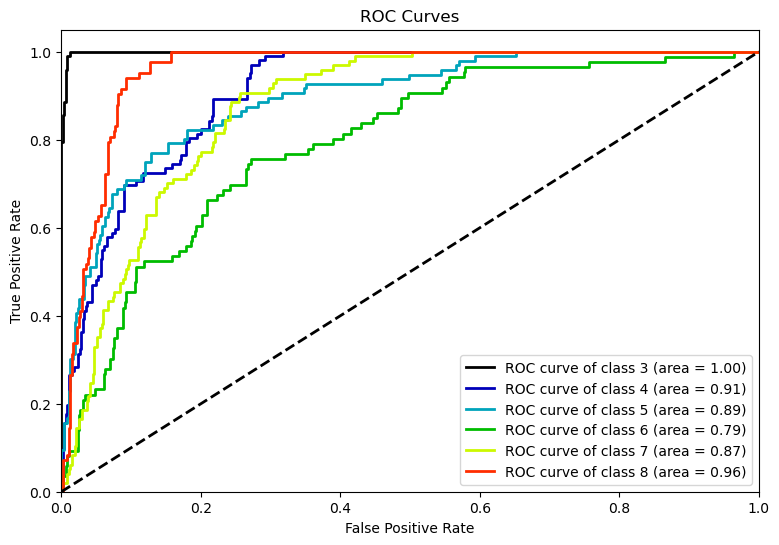


 Interpreting the Output of Logistic Regression :

 Intercept  -6.521598918015108
Classes [3 4 5 6 7 8]


coeff
volatile acidity      3.848036
citric acid           1.604631
residual sugar       -0.269843
chlorides             0.605142
free sulfur dioxide  -0.968269
total sulfur dioxide -0.688985
density               2.031879
pH                    1.126545
sulphates            -0.663557
alcohol              -4.216967
Id                    2.852481

In [74]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

space = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100]
}

model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# rcv = RandomizedSearchCV(model, space, scoring = 'accuracy', n_jobs = -1, cv = cv)

lr = model.fit(train_scaled, y_train)

lr_pred = lr.predict(test_scaled)
y_pred = lr_pred
y_proba = lr.predict_proba(test_scaled)

classification_summary(y_pred, y_proba, 0)
#auc_roc_curve(y_test, y_pred)


print("\n Interpreting the Output of Logistic Regression :")

print('\n Intercept ', lr.intercept_[0])
print('Classes', lr.classes_)

display(pd.DataFrame({'coeff': lr.coef_[0]}, index = train_scaled.columns))

# 2) Descision Tree Classifier

Accuracy: 65.06%

 F1 Score (weighted): 65.35

 Confusion Matrix:
[[77  1  2 17  0  0]
 [13 75  5  3  6  0]
 [ 4 12 41 32  7  0]
 [ 0  9 23 39 11  4]
 [ 0  3  2 11 72  9]
 [ 0  0  1  7 14 61]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.82      0.79      0.81        97
           4       0.75      0.74      0.74       102
           5       0.55      0.43      0.48        96
           6       0.36      0.45      0.40        86
           7       0.65      0.74      0.70        97
           8       0.82      0.73      0.78        83

    accuracy                           0.65       561
   macro avg       0.66      0.65      0.65       561
weighted avg       0.66      0.65      0.65       561



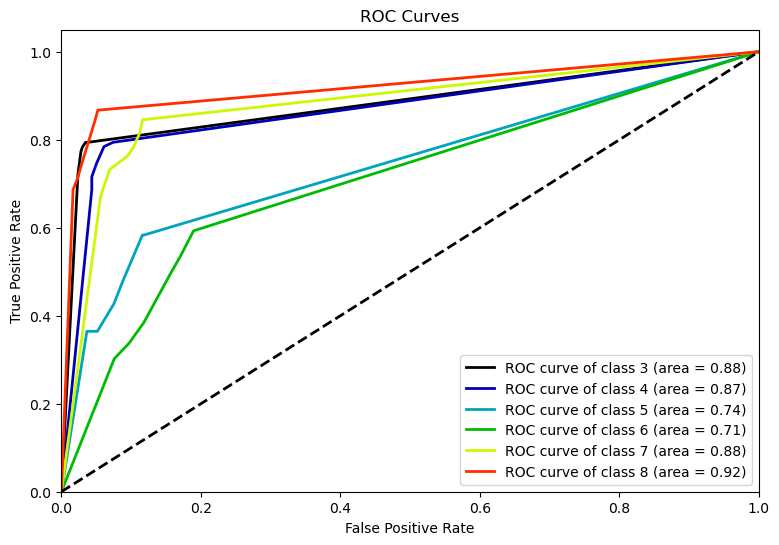

                           
 Interpreting the output of decision tree :                             


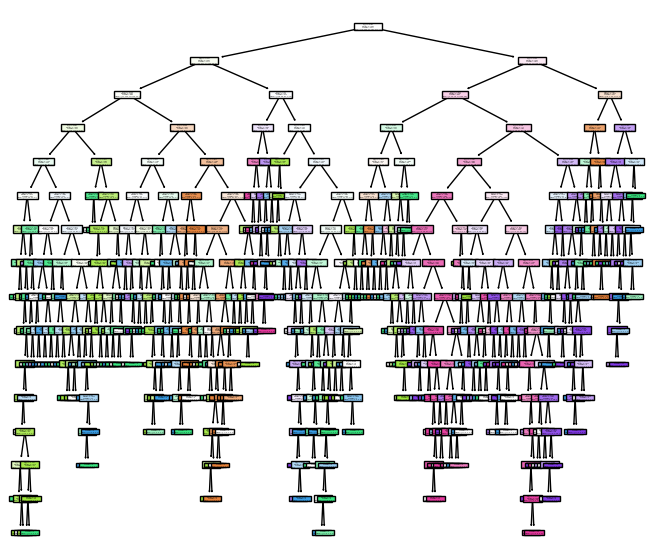

In [76]:
from sklearn.tree import plot_tree

dt_model = DecisionTreeClassifier()

param = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10, 15], 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

rcv = RandomizedSearchCV(dt_model, param, n_iter = 50, scoring = 'f1_weighted', n_jobs = -1, cv = cv)

dt = rcv.fit(train_scaled, y_train).best_estimator_
dtc_pred = dt.predict(test_scaled)
y_proba = dt.predict_proba(test_scaled)

classification_summary(dtc_pred, y_proba, 1)

print("\n Interpreting the output of decision tree : ".center(100))
plt.figure(figsize=(8, 7))
plot_tree(dt, filled = True)
plt.show()

# 3) Random Forest Classifier

Accuracy: 86.10%

 F1 Score (weighted): 85.63

 Confusion Matrix:
[[96  0  0  1  0  0]
 [ 0 99  2  0  1  0]
 [ 3  5 61 21  6  0]
 [ 0  0 16 55 13  2]
 [ 0  0  0  1 91  5]
 [ 0  0  0  0  2 81]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.97      0.99      0.98        97
           4       0.95      0.97      0.96       102
           5       0.77      0.64      0.70        96
           6       0.71      0.64      0.67        86
           7       0.81      0.94      0.87        97
           8       0.92      0.98      0.95        83

    accuracy                           0.86       561
   macro avg       0.85      0.86      0.85       561
weighted avg       0.86      0.86      0.86       561



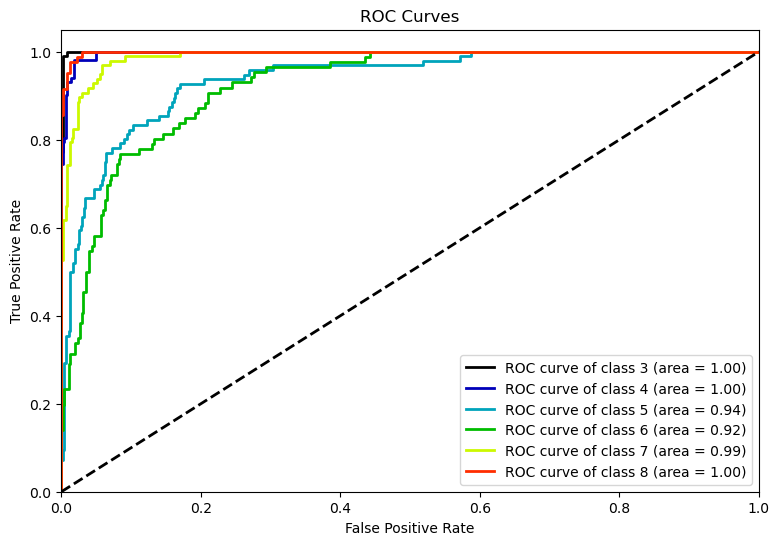

                      
 Interpreting the output of Random Forest Classifier :                       


Text(0.5, 1.0, 'Feature Importance in Random Forest Classifier')

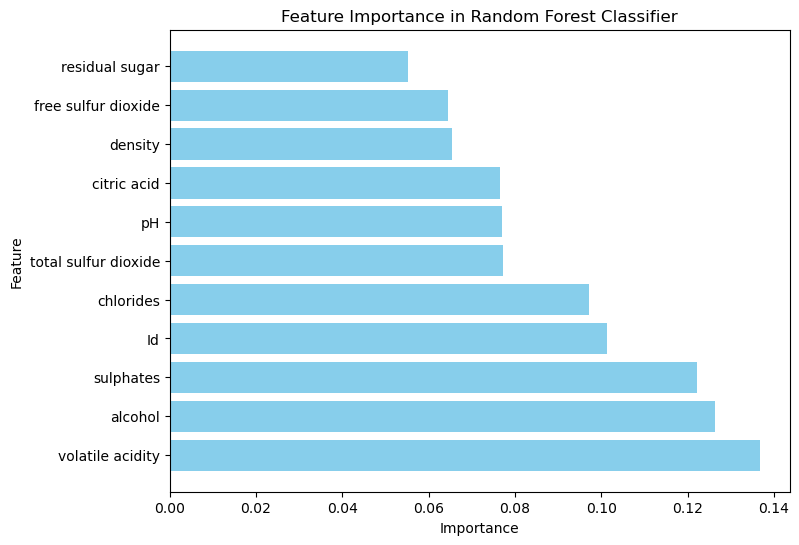

In [77]:
rf_model = RandomForestClassifier()

param = {'n_estimators': [100, 200,250, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 3], 'max_features': ['auto', 'sqrt']}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

rcv = RandomizedSearchCV(rf_model, param, scoring = 'f1_weighted', n_iter = 50, cv = 5, n_jobs=-1)

rf = rcv.fit(train_scaled, y_train).best_estimator_
rf_pred = rf.predict(test_scaled)
y_proba = rf.predict_proba(test_scaled)

classification_summary(rf_pred, y_proba, 2)

print("\n Interpreting the output of Random Forest Classifier : ".center(100))

# Random Forest provides a measure of feature importance.

imp = rf.feature_importances_
feature = train_scaled.columns

df = pd.DataFrame({'Feature' : feature, 'Importance' : imp})
temp = df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(8, 6))
plt.barh(temp['Feature'], temp['Importance'], color = 'skyblue')
plt.xlabel('Importance') 
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')

# 4) Naive Bayes Classifier

Accuracy: 50.80%

 F1 Score (weighted): 48.81

 Confusion Matrix:
[[80  8  9  0  0  0]
 [27 43 13 13  3  3]
 [13 17 44 15  4  3]
 [ 4 15 14 20 15 18]
 [ 0  6  3  9 31 48]
 [ 0  4  0  2 10 67]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.65      0.82      0.72        97
           4       0.46      0.42      0.44       102
           5       0.53      0.46      0.49        96
           6       0.34      0.23      0.28        86
           7       0.49      0.32      0.39        97
           8       0.48      0.81      0.60        83

    accuracy                           0.51       561
   macro avg       0.49      0.51      0.49       561
weighted avg       0.49      0.51      0.49       561



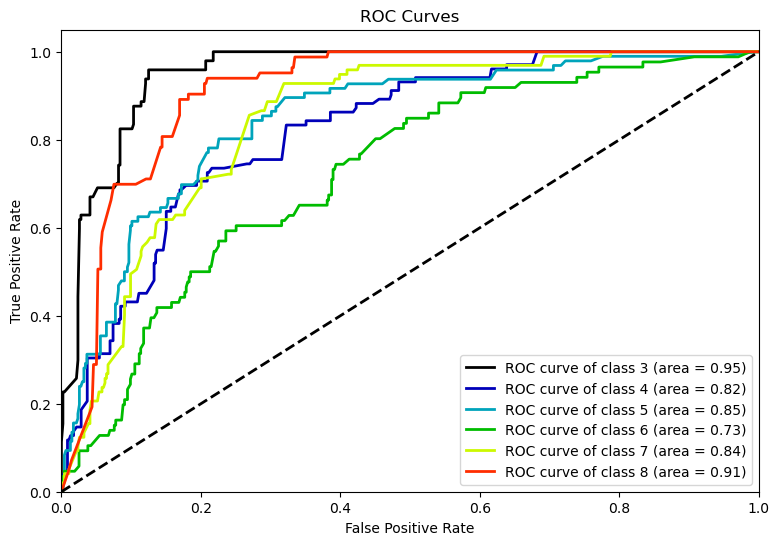

In [78]:
nb_model = BernoulliNB()

param = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

rcv = RandomizedSearchCV(nb_model, param, scoring = 'accuracy', cv = 6, n_jobs=-1)

nb = rcv.fit(train_scaled, y_train).best_estimator_
nb_pred = nb.predict(test_scaled)
y_proba = nb.predict_proba(test_scaled)

classification_summary(nb_pred, y_proba, 3)

# 5) Support Vector Machine Classfier

Accuracy: 89.13%

 F1 Score (weighted): 89.16

 Confusion Matrix:
[[97  0  0  0  0  0]
 [ 0 95  2  4  1  0]
 [ 0  2 62 30  2  0]
 [ 0  0 11 72  3  0]
 [ 0  0  0  4 91  2]
 [ 0  0  0  0  0 83]]

 Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        97
           4       0.98      0.93      0.95       102
           5       0.83      0.65      0.73        96
           6       0.65      0.84      0.73        86
           7       0.94      0.94      0.94        97
           8       0.98      1.00      0.99        83

    accuracy                           0.89       561
   macro avg       0.90      0.89      0.89       561
weighted avg       0.90      0.89      0.89       561



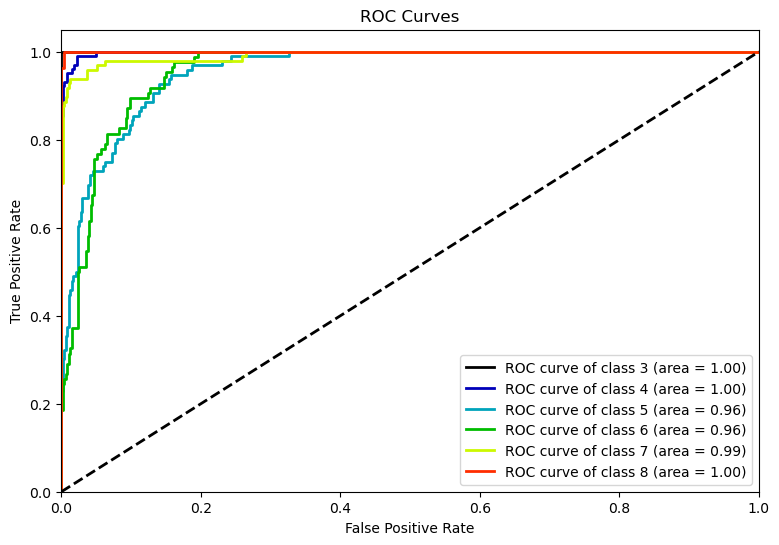

In [79]:
SVM_model = SVC(probability=True).fit(train_scaled, y_train)

param = {"C": [0.001, .01, .1, 1, 5, 10, 100], "gamma": [.01, .1, 1, 5, 10, 100], "kernel": ["linear", "polynomial", "rbf"]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

rcv = RandomizedSearchCV(SVM_model, param, n_iter = 50, scoring ='f1_weighted', n_jobs = -1, cv = 6)

SVM = rcv.fit(train_scaled, y_train).best_estimator_
svm_pred = SVM.predict(test_scaled)
pred_prob = SVM.predict_proba(test_scaled)
classification_summary(svm_pred, pred_prob, 4)

In [80]:
SVM

SVC(C=1, gamma=1, probability=True)

# 6) K-Nearest Neighbours Classfier

Accuracy: 83.42%

 F1 Score (weighted): 82.37

 Confusion Matrix:
[[ 97   0   0   0   0   0]
 [  0 101   0   0   1   0]
 [  3   9  54  22   8   0]
 [  0   6  15  46  15   4]
 [  0   1   1   1  87   7]
 [  0   0   0   0   0  83]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98        97
           4       0.86      0.99      0.92       102
           5       0.77      0.56      0.65        96
           6       0.67      0.53      0.59        86
           7       0.78      0.90      0.84        97
           8       0.88      1.00      0.94        83

    accuracy                           0.83       561
   macro avg       0.82      0.83      0.82       561
weighted avg       0.83      0.83      0.82       561



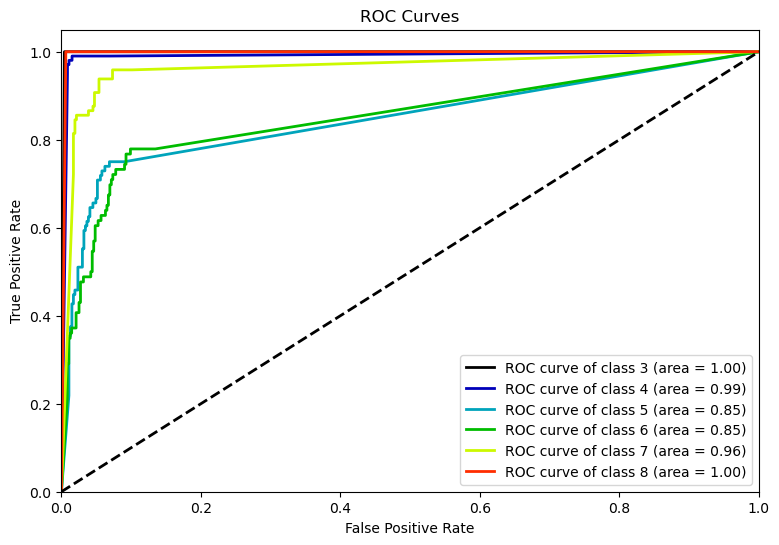

In [81]:
knn_model = KNeighborsClassifier()

param = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

rcv = RandomizedSearchCV(knn_model, param, scoring = 'f1_weighted', n_jobs = -1, cv = 6)

knn = rcv.fit(train_scaled, y_train).best_estimator_
knn_pred = knn.predict(test_scaled)
y_proba = knn.predict_proba(test_scaled)

classification_summary(knn_pred, y_proba, 5)

In [82]:
knn

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

# 7) Gradient Boosting

Accuracy: 86.45%

 F1 Score (weighted): 85.81

 Confusion Matrix:
[[97  0  0  0  0  0]
 [ 0 98  1  1  1  1]
 [ 3  6 65 21  1  0]
 [ 0  0 19 48 14  5]
 [ 0  0  0  1 94  2]
 [ 0  0  0  0  0 83]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98        97
           4       0.94      0.96      0.95       102
           5       0.76      0.68      0.72        96
           6       0.68      0.56      0.61        86
           7       0.85      0.97      0.91        97
           8       0.91      1.00      0.95        83

    accuracy                           0.86       561
   macro avg       0.85      0.86      0.85       561
weighted avg       0.86      0.86      0.86       561



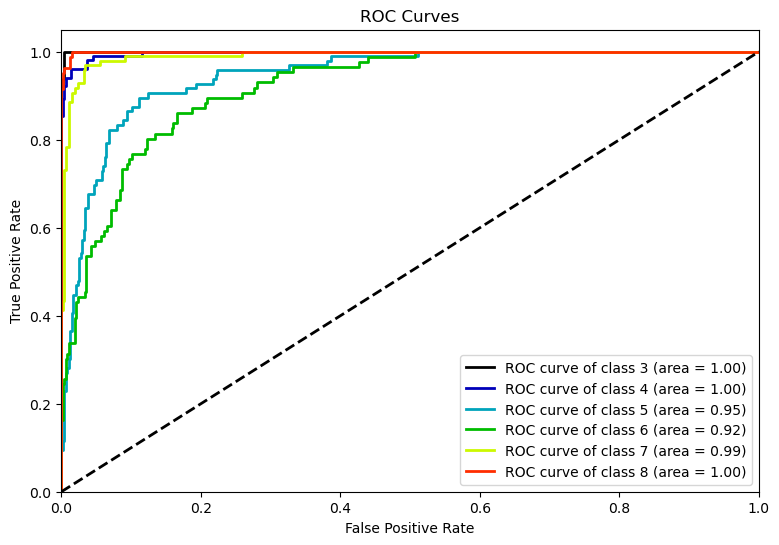

                         
 Interpreting the output of Gradient Boosting :                           


Text(0.5, 1.0, 'Feature Importance in Gradient Boosting')

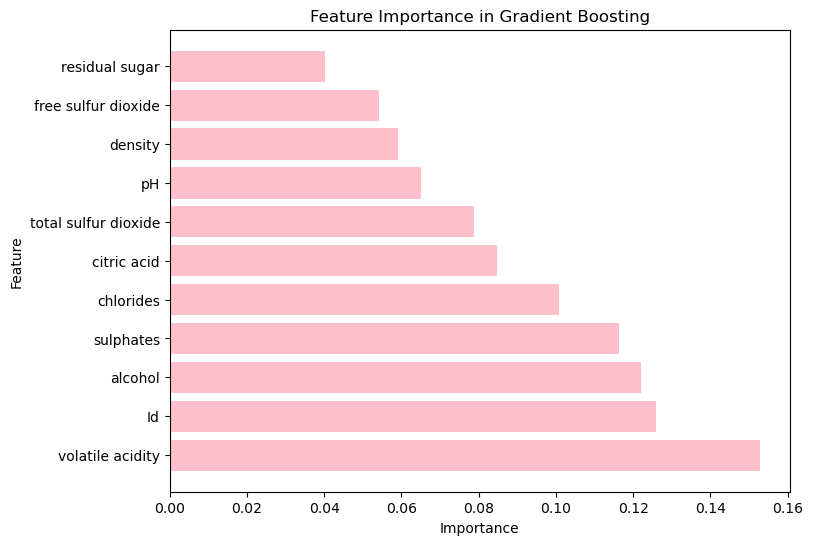

In [83]:
gb_model = GradientBoostingClassifier()

param = {'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of individual trees
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

rcv = RandomizedSearchCV(gb_model, param, scoring = 'f1_weighted', n_jobs = -1, cv = 6)

gb = rcv.fit(train_scaled, y_train).best_estimator_
gb_pred = gb.predict(test_scaled)
y_proba = gb.predict_proba(test_scaled)

classification_summary(gb_pred, y_proba, 6)

# Features with higher importance scores are more influential in the model’s predictions.

print("\n Interpreting the output of Gradient Boosting : ".center(100))
imp = gb.feature_importances_
feature = train_scaled.columns

df = pd.DataFrame({'Feature' : feature, 'Importance' : imp})
temp = df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(8, 6))
plt.barh(temp['Feature'], temp['Importance'], color = 'pink')
plt.xlabel('Importance') 
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')

In [84]:
gb

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=150,
                           subsample=0.9)

# 8) Extreme Gradient Boosting

Accuracy: 85.56%

 F1 Score (weighted): 84.93

 Confusion Matrix:
[[97  0  0  0  0  0]
 [ 7 58 15 18  2  2]
 [ 7 14 54 15  5  1]
 [ 2  9 11 37 20  7]
 [ 0  3  1 14 44 35]
 [ 0  0  0  0  9 74]]

 Classification Report:
              precision    recall  f1-score   support

           3       0.86      1.00      0.92        97
           4       0.69      0.57      0.62       102
           5       0.67      0.56      0.61        96
           6       0.44      0.43      0.44        86
           7       0.55      0.45      0.50        97
           8       0.62      0.89      0.73        83

    accuracy                           0.65       561
   macro avg       0.64      0.65      0.64       561
weighted avg       0.64      0.65      0.64       561



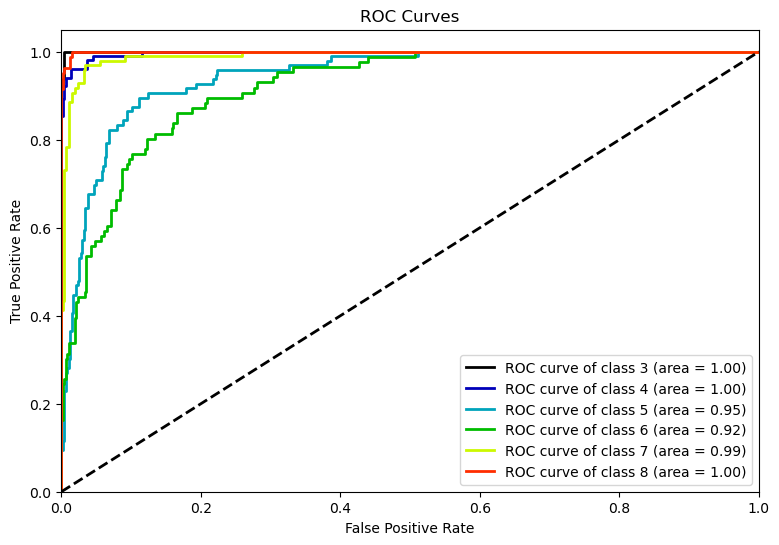

                         
 Interpreting the output of Gradient Boosting :                           


Text(0.5, 1.0, 'Feature Importance in Gradient Boosting')

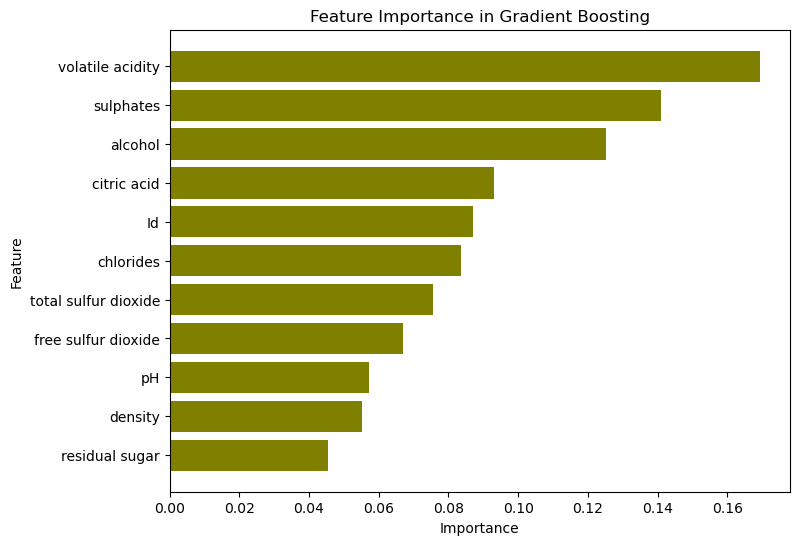

In [85]:
xgb_model = XGBClassifier()

param_dist = {"learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_test.min()

# rcv = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

xgb = xgb_model.fit(train_scaled, y_train_adjusted, eval_metric='logloss')#.best_estimator_
xgb_pred = xgb.predict(test_scaled)
pred_prob = xgb.predict_proba(test_scaled)

accuracy = accuracy_score(y_test_adjusted, xgb_pred)
precision = precision_score(y_test_adjusted, xgb_pred, average = 'weighted')
recall = recall_score(y_test_adjusted, xgb_pred, average = 'weighted')
f1 = f1_score(y_test_adjusted, xgb_pred, average = 'weighted')
roc_auc = roc_auc_score(y_test_adjusted, y_proba, multi_class = 'ovr')
    
evaluation_table.iloc[7]['Accuracy'] = round(accuracy, 3)*100
evaluation_table.iloc[7]['Precision'] = round(precision, 3)*100
evaluation_table.iloc[7]['Recall'] = round(recall, 3)*100
evaluation_table.iloc[7]['F1-Score'] = round(f1, 3)*100
evaluation_table.iloc[7]['AUC-ROC Score'] = round(roc_auc, 3)*100
    
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"\n F1 Score (weighted): {f1 * 100:.2f}")
    
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:")
print(conf_matrix)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))
    
fig, ax = plt.subplots(figsize = (9,6))
auc_roc(y_test, y_proba, curves = ["each_class"], ax = ax) 
plt.show()

# Features with higher importance scores are more influential in the model’s predictions.

print("\n Interpreting the output of Gradient Boosting : ".center(100))
imp = xgb.feature_importances_
feature = train_scaled.columns

df = pd.DataFrame({'Feature' : feature, 'Importance' : imp})
temp = df.sort_values(by = 'Importance', ascending = True)

plt.figure(figsize=(8, 6))
plt.barh(temp['Feature'], temp['Importance'], color = 'Olive')
plt.xlabel('Importance') 
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')

In [86]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [87]:
evaluation_table

Accuracy  Precision  Recall  F1-Score  \
Logistic Regression (LR)             64.9       64.3    64.9      63.9   
Decision Tree Classifier (DT)        65.1       66.3    65.1      65.4   
Random Forest Classifier (RF)        86.1       85.6    86.1      85.6   
Naïve Bayes Classifier (NB)          50.8       49.5    50.8      48.8   
Support Vector Machine (SVM)         89.1       89.9    89.1      89.2   
K Nearest Neighbours (KNN)           83.4       82.5    83.4      82.4   
Gradient Boosting (GB)               86.5       85.6    86.5      85.8   
Extreme Gradient Boosting (XGB)      85.6       85.0    85.6      84.9   

                                 AUC-ROC Score  
Logistic Regression (LR)                  90.5  
Decision Tree Classifier (DT)             83.3  
Random Forest Classifier (RF)             97.4  
Naïve Bayes Classifier (NB)               85.0  
Support Vector Machine (SVM)              98.4  
K Nearest Neighbours (KNN)                94.1  
Gradient Boosting (GB)                    97.5  
Extreme Gradient Boosting (XGB)           97.5

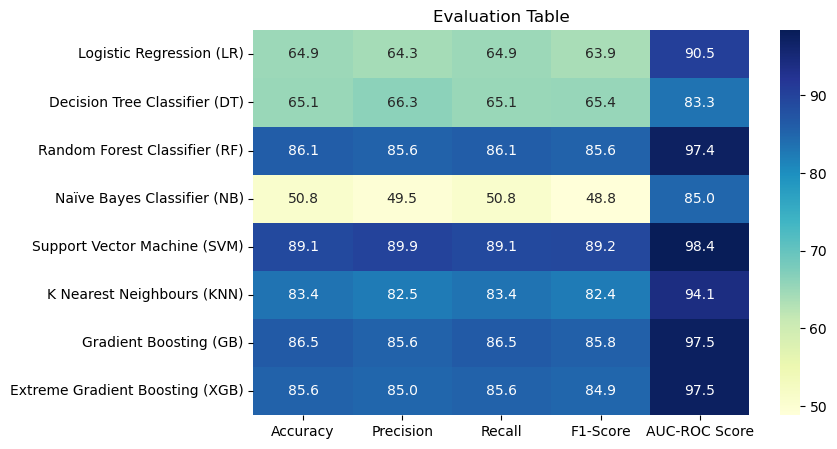

In [88]:
# Comparing all Model Scores

plt.figure(figsize=(8, 5))  
sns.heatmap(evaluation_table, annot = True, cmap = 'YlGnBu', fmt = '.1f')
plt.title('Evaluation Table')
plt.show()

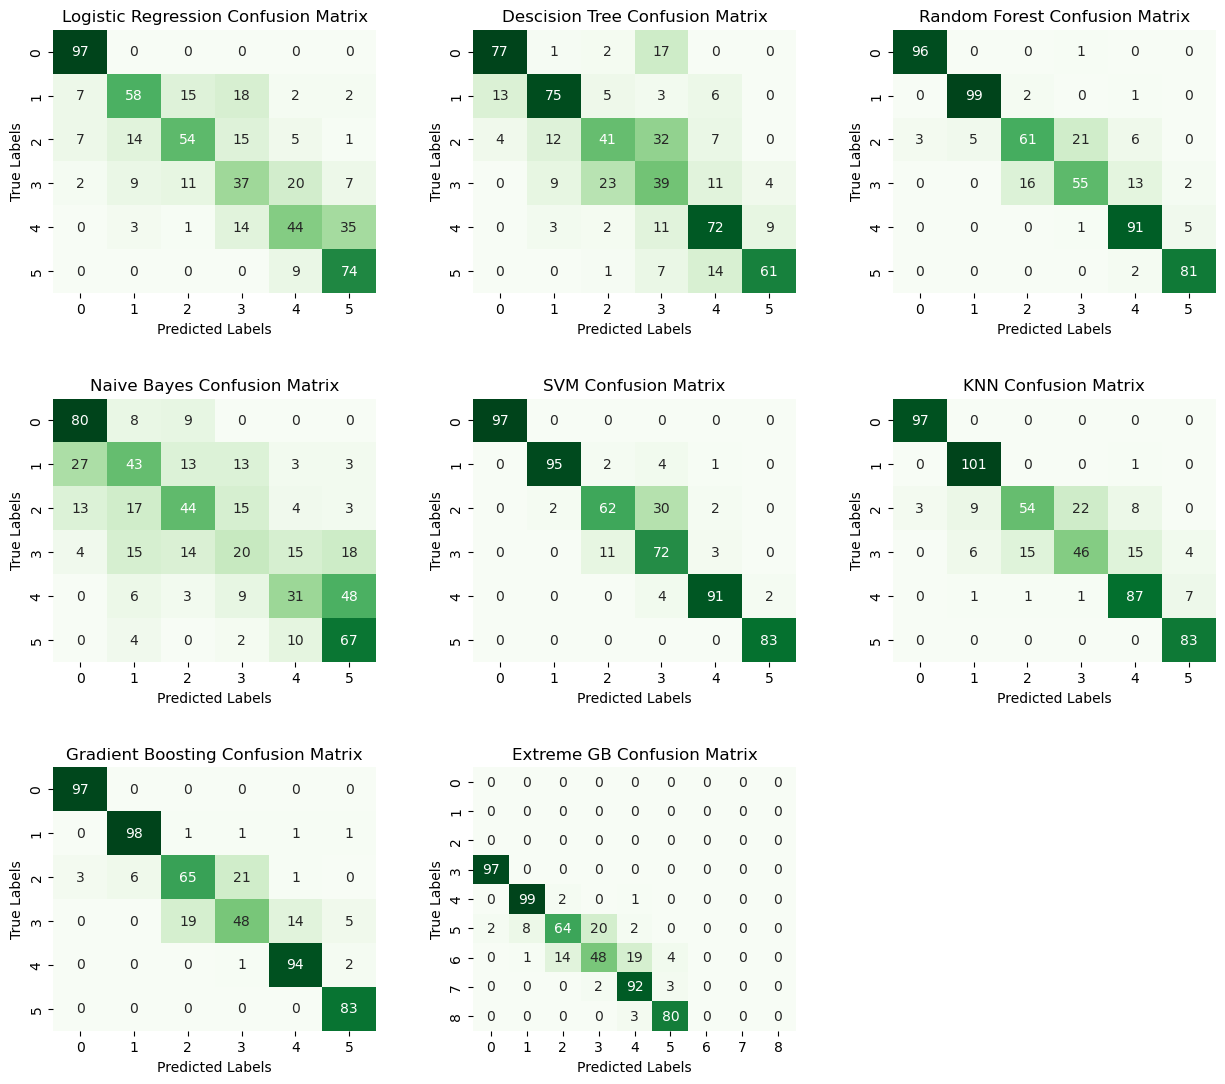

In [90]:
#Plotting Confusion-Matrix of all the predictive Models

model_names = ['Logistic Regression', 'Descision Tree', 'Random Forest', 'Naive Bayes', 'SVM', 'KNN', 
               'Gradient Boosting', 'Extreme GB']

predictions = [lr_pred, dtc_pred, rf_pred, nb_pred, svm_pred, knn_pred, gb_pred, xgb_pred]

true_labels = y_test

n_models = len(model_names)

fig, axes = plt.subplots(3, 3, figsize = (15, 13))

axes = axes.flatten()
for i, (model_name, y_pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(true_labels, y_pred)
    
    sns.heatmap(cm, annot=True, fmt = "d", cmap = "Greens", ax = axes[i], cbar = False)
    
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

axes[-1].axis('off') # Hide the last empty subplot

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.show()

# Project Outcomes & Conclusions

Here are some of the key outcomes of the project :
    
* The Dataset was small totally around 1200 samples & after preprocessing 1.3% of the datasamples were dropped.
* The samples were highly imbalanced, hence SMOTE Technique was applied on the data to balance the classes.
* Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
* Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
* The boosting & ensemble algorithms perform the best on the current dataset, followed by Nearest Neighbours Algorithm.